# <font color='#66CDAA'>Stock Price EDA and Analysis (Time Series)</font>

Welcome to this Jupyter notebook where we will be conducting an Exploratory Data Analysis (EDA) and Time Series Analysis on stock prices. The goal of this notebook is to provide a comprehensive understanding of trends, patterns, and characteristics in our stock price dataset.

## <font color='#00FA9A'>Overview</font>

In the first part of the notebook, we'll start by importing the necessary libraries and loading our dataset. The EDA process will involve cleaning and preprocessing our data, checking for missing values, and then visualizing the data to uncover potential patterns, trends, and outliers.

In the second part of the notebook, we'll conduct a Time Series Analysis on the stock prices. Time series analysis is a statistical technique that deals with time series data, or trend analysis. It involves various methods to extract meaningful statistics and other characteristics of the data to model and forecast future points in the series.

## <font color='#00FA9A'>Libraries</font>

The necessary Python libraries for handling data, visualizing data, and building the model are imported. These libraries include `pandas`, `numpy`, `matplotlib`, `seaborn`, `yfinance`, `statsmodels`, `pmdarima`, and `warnings`.

## <font color='#00FA9A'>Dataset and Data Retrieval</font>

The function `get_stock_data` is defined to fetch stock data for specific tickers between a given start and end date from Yahoo Finance. The data is fetched for four companies: `Apple`, `Google`, `Microsoft`, and `Amazon`.

By the end of this notebook, we hope to have extracted meaningful insights from our data and built a reliable time series model that can predict future stock prices.

## <font color='#00FA9A'>Data Visualization</font>

The stock data is visualized using line plots and bar plots. These visualizations include volume over time for each company, daily price change, monthly and yearly average closing prices for Apple, pairplots and heatmaps of closing prices and daily returns for all companies, and more.

## <font color='#00FA9A'>Data Preprocessing</font>

The closing prices are transformed to their logarithmic form to stabilize the variance. The data is split into training and testing sets in a chronological manner.

## <font color='#00FA9A'>Stationary test</font>

The Augmented Dickey-Fuller (ADF) test is performed on the training data to check for stationarity. The rolling mean and standard deviation are also plotted.

## <font color='#00FA9A'>Autocorrelation and Partial Autocorrelation</font>

Autocorrelation and partial autocorrelation plots are generated for the differences in the closing prices.

## <font color='#00FA9A'>ARIMA Model Training</font>

An ARIMA model is fit to the training data using the auto_arima function, which automatically determines the best parameters (p, d, q) for the model.

## <font color='#00FA9A'>Forecast and Evaluation</font>

The trained model is used to forecast the closing prices for the test set. The forecasts are plotted alongside the actual values. The residuals of the model are also plotted and their statistics are displayed. Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) are calculated to evaluate the performance of the model.

## <font color='#00FA9A'>Future Forecasting</font>

The model is used to forecast the closing prices for the next 180 business days. These forecasts are also plotted.



### Let's get started!


In [471]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [472]:
# Function to get stock data
def get_stock_data(tickers, start_date, end_date):
    """Get stock data from Yahoo Finance."""
    data = pd.DataFrame()
    for ticker in tickers:
        tickerData = yf.Ticker(ticker)
        tickerDf = tickerData.history(start=start_date, end=end_date)
        tickerDf['Name'] = ticker
        data = pd.concat([data, tickerDf], axis=0)
    return data

In [473]:
# Get stock data
tickerSymbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
start_date = '2018-01-01'
end_date = '2023-07-31'
stocks_data = get_stock_data(tickerSymbols, start_date, end_date)

stocks_data.shape


(5608, 8)

In [474]:
# DataFrame that includes information on all four stocks
stocks_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
Date,,,,,,,,
2018-01-02 00:00:00-05:00,40.333811,40.841065,40.120477,40.831581,102223600,0.0,0.0,AAPL
2018-01-03 00:00:00-05:00,40.895585,41.374396,40.760478,40.824474,118071600,0.0,0.0,AAPL
2018-01-04 00:00:00-05:00,40.897951,41.118395,40.788917,41.014099,89738400,0.0,0.0,AAPL
2018-01-05 00:00:00-05:00,41.111283,41.568758,41.018839,41.481056,94640000,0.0,0.0,AAPL
2018-01-08 00:00:00-05:00,41.326996,41.625658,41.227438,41.326996,82271200,0.0,0.0,AAPL


In [475]:
stocks_data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Name             object
dtype: object

### Total volume of stock traded each day

In [476]:
import plotly.express as px
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1.5})
for company in stocks_data['Name'].unique():
    df = stocks_data[stocks_data['Name'] == company]
    fig = px.line(df.reset_index(), x='Date', y='Volume', title=company)  
    fig.show()

### The daily closing prices for each company

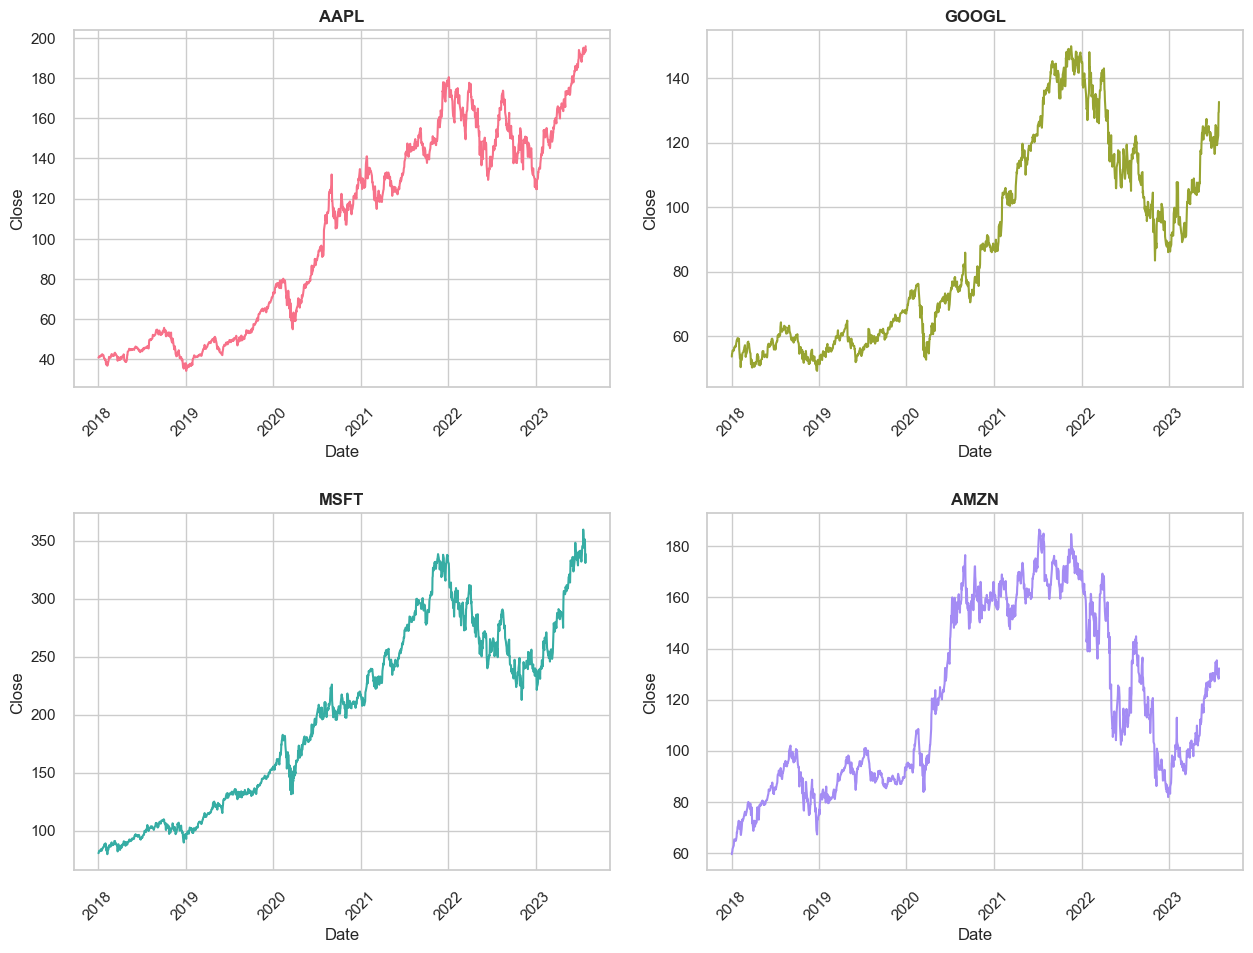

In [477]:
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1.5})
palette = sns.color_palette('husl', len(stocks_data['Name'].unique()))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
for i, (ax, company) in enumerate(zip(axes.flatten(), stocks_data['Name'].unique())):
    df = stocks_data[stocks_data['Name'] == company]
    sns.lineplot(data=df, x='Date', y='Close', ax=ax, color=palette[i])
    ax.set_title(company, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout(pad=2.0)
plt.show()


In [478]:
# Get data for each company separately
stocks_apple = stocks_data[stocks_data['Name'] == 'AAPL'].copy()
stocks_google = stocks_data[stocks_data['Name'] == 'GOOGL'].copy()
stocks_microsoft = stocks_data[stocks_data['Name'] == 'MSFT'].copy()
stocks_amazon = stocks_data[stocks_data['Name'] == 'AMZN'].copy()

### Analyzing the Apple Inc. Stock

In the remainder of this notebook, we will be focusing closely on Apple stocks (AAPL).

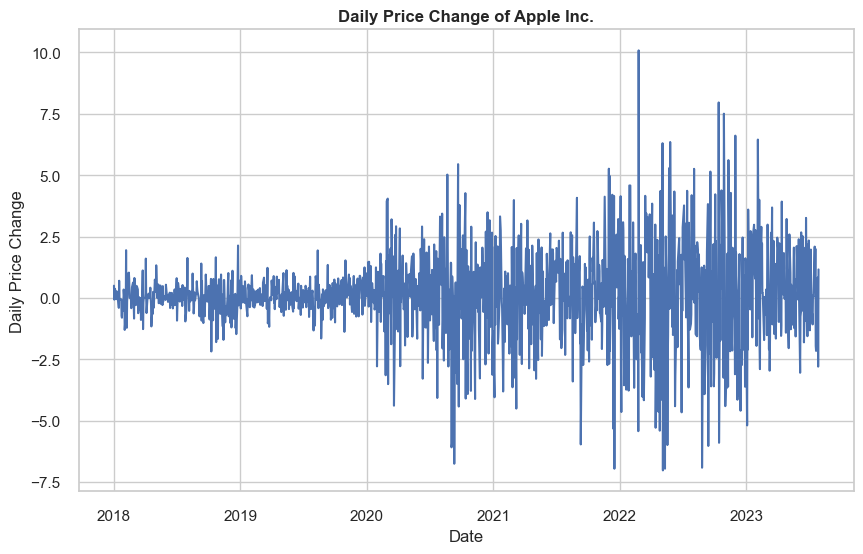

In [479]:
# Calculate daily price change for Apple
stocks_apple['Daily Price Change']= stocks_apple['Close'] - stocks_apple['Open']
stocks_apple['% Daily Price Change']= ((stocks_apple['Daily Price Change'])/stocks_apple['Close'])*100
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1.5})
plt.figure(figsize=(10,6))
sns.lineplot(data=stocks_apple, x='Date', y='Daily Price Change')
plt.title('Daily Price Change of Apple Inc.', fontweight='bold')
plt.show()

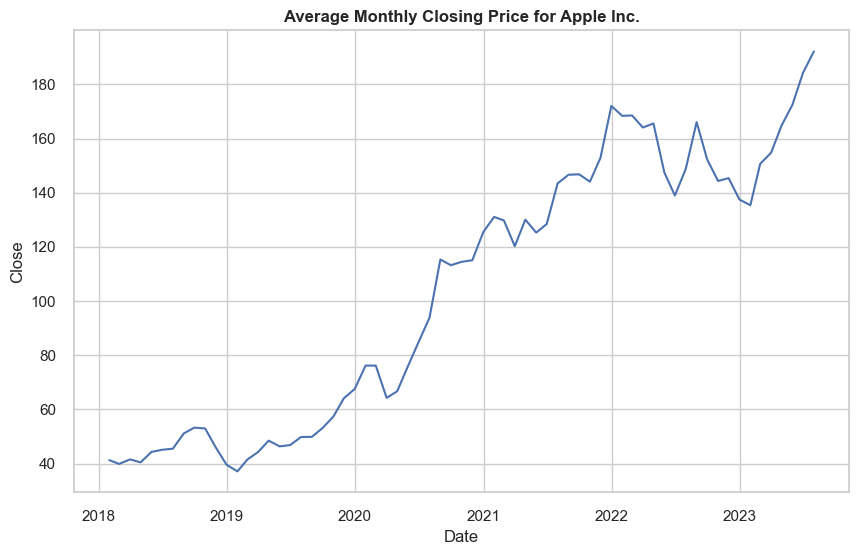

In [480]:
# Visualize average monthly closing price for Apple
monthly_data_apple = stocks_apple['Close'].resample('M').mean().reset_index()
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1.5})
sns.lineplot(data=monthly_data_apple, x='Date', y='Close')
plt.title('Average Monthly Closing Price for Apple Inc.', fontweight='bold')
plt.show()

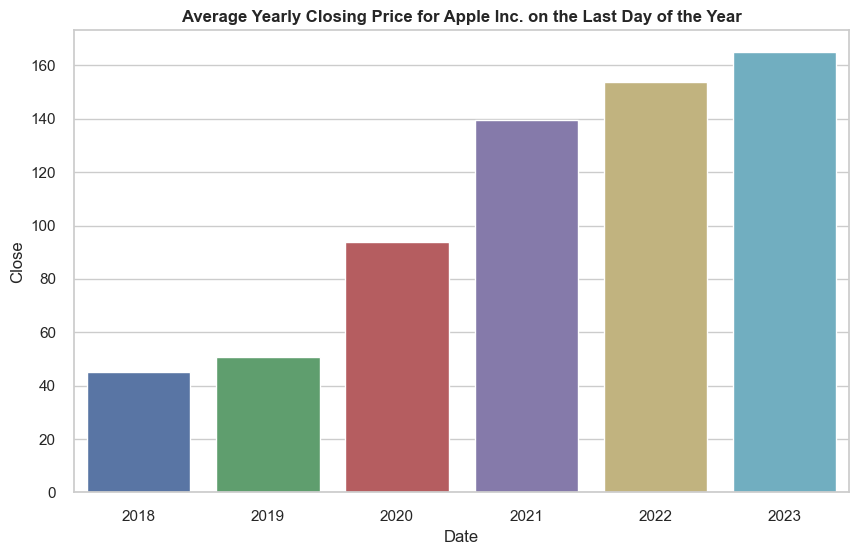

In [481]:
# Visualize average yearly closing price for Apple
yearly_data_apple = stocks_apple['Close'].resample('Y').mean().reset_index()
yearly_data_apple['Date'] = yearly_data_apple['Date'].dt.strftime('%Y')
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1.5})
sns.barplot(data=yearly_data_apple, x='Date', y='Close')
plt.title('Average Yearly Closing Price for Apple Inc. on the Last Day of the Year', fontweight='bold')
plt.show()

### Correlation between stock prices of tech companies

Now it's time to see if there is any correlation betweens the closing price of these stocks. 

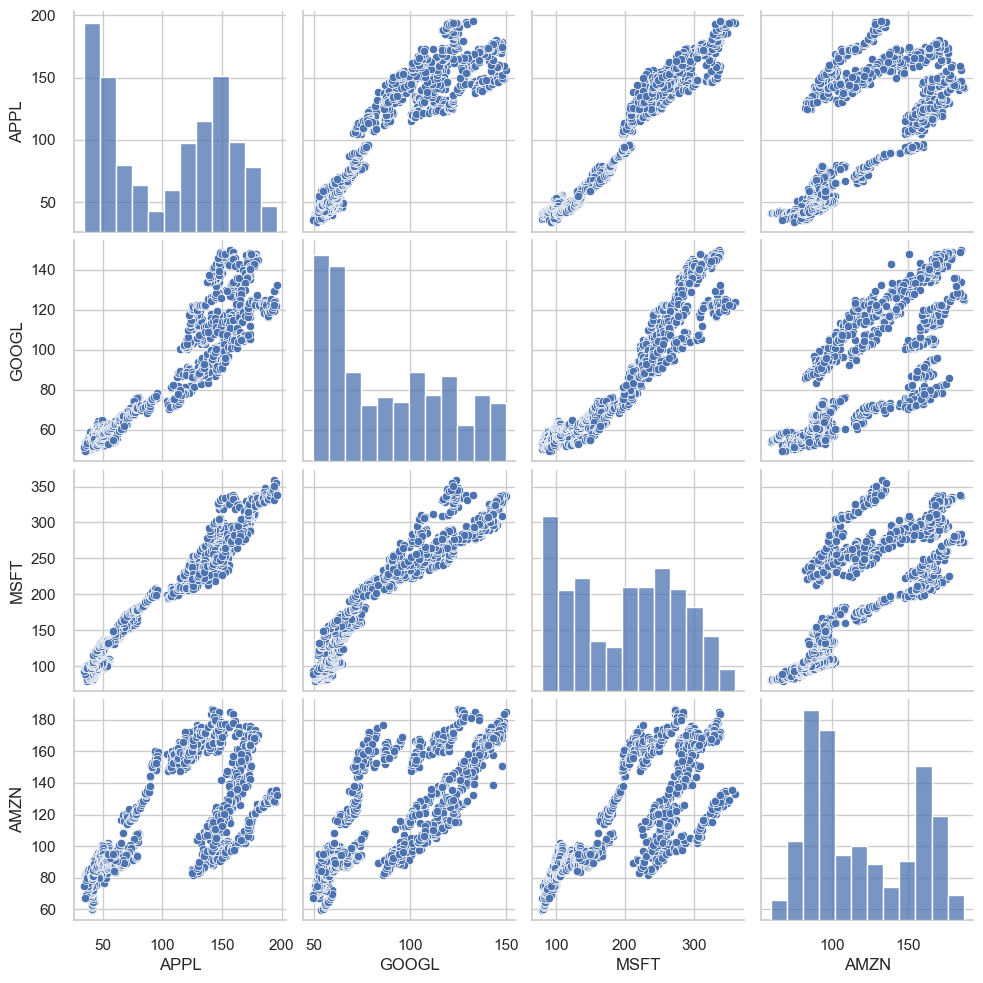

In [482]:
# Get closing prices for all companies
stocks_close = pd.DataFrame()
stocks_close['APPL'] = stocks_apple['Close']
stocks_close['GOOGL'] = stocks_google['Close']
stocks_close['MSFT'] = stocks_microsoft['Close']
stocks_close['AMZN'] = stocks_amazon['Close']
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1.5})
sns.pairplot(data=stocks_close)

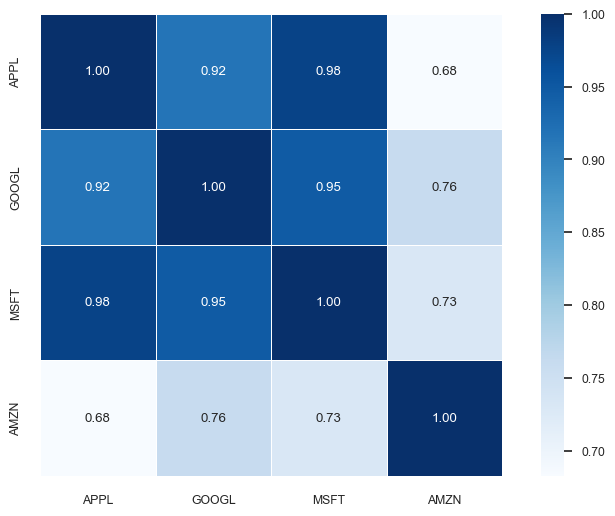

In [483]:
# Heatmap of correlations between closing prices
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=0.8, rc={'lines.linewidth': 1.5})
sns.heatmap(stocks_close.corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.show()

We can also investigate the correlation between the daily retuen of each stock.

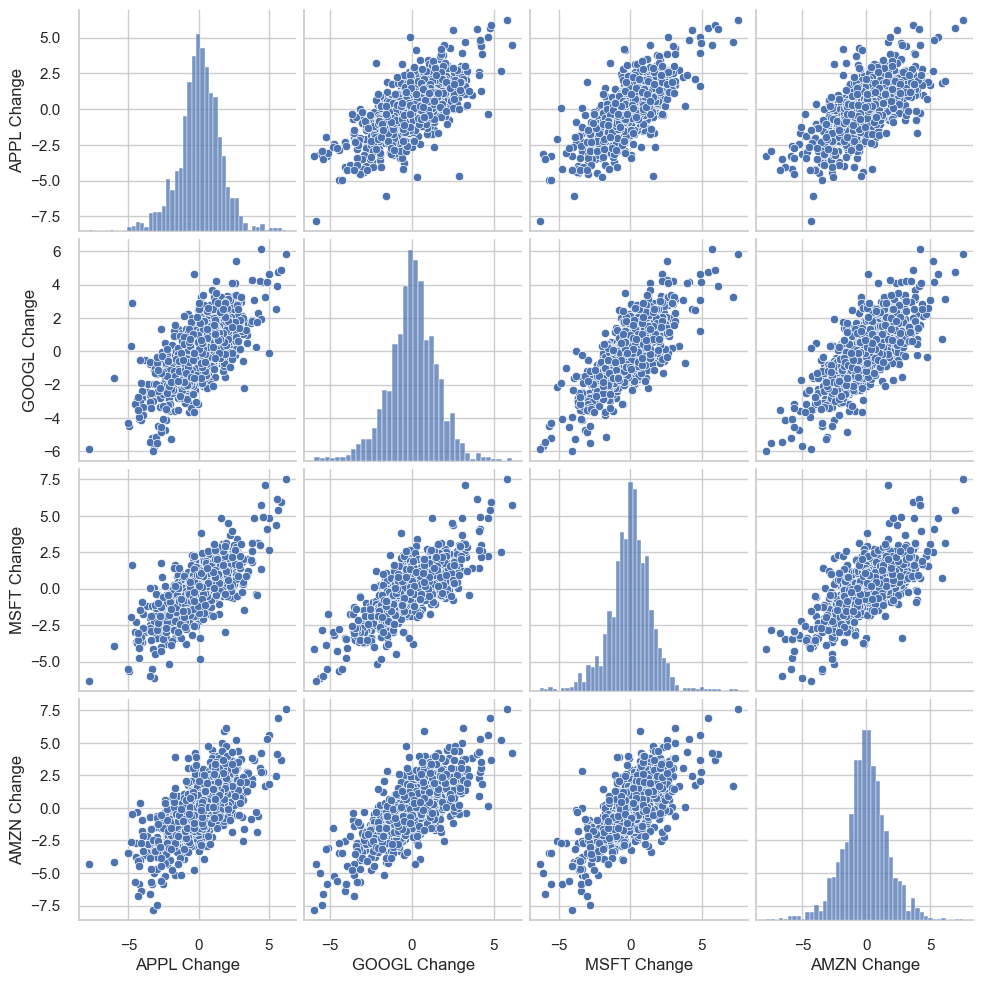

In [484]:
# Calculate daily return for all companies
stocks_daily_return = pd.DataFrame()
stocks_daily_return['APPL Change']= ((stocks_apple['Close'] - stocks_apple['Open']) / stocks_apple['Close'])*100
stocks_daily_return['GOOGL Change']= ((stocks_google['Close'] - stocks_google['Open']) / stocks_google['Close'])*100
stocks_daily_return['MSFT Change']= ((stocks_microsoft['Close'] - stocks_microsoft['Open']) / stocks_microsoft['Close'])*100
stocks_daily_return['AMZN Change']= ((stocks_amazon['Close'] - stocks_amazon['Open']) / stocks_amazon['Close'])*100
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1.5})
sns.pairplot(data=stocks_daily_return)

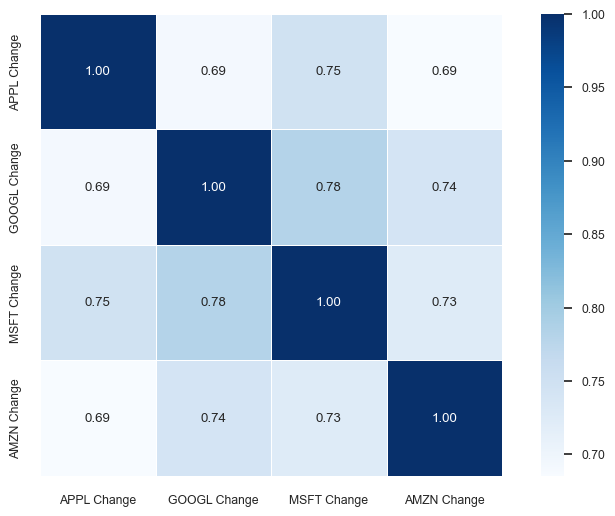

In [485]:
# Heatmap of correlations between daily returns
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=0.8, rc={'lines.linewidth': 1.5})
sns.heatmap(stocks_daily_return.corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues')
plt.show()

In [486]:
# Resample the data to the business day frequency ('B')
stocks_apple_resampled = stocks_apple.resample('B').mean(numeric_only=True)

# Use forward-fill to handle any remaining missing values
stocks_apple_resampled = stocks_apple_resampled.ffill()

# Assign frequency
stocks_apple_resampled = stocks_apple_resampled.asfreq('B')


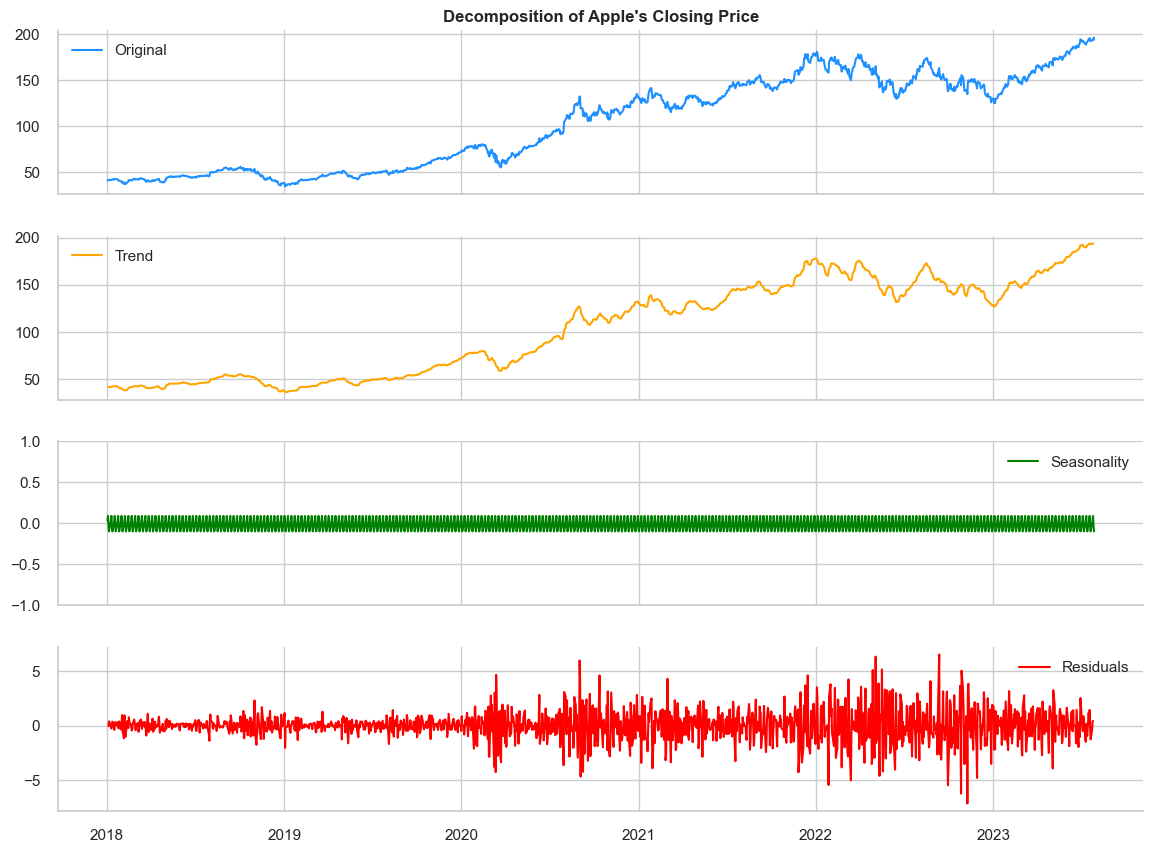

In [487]:
# Set style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
fig, axes = plt.subplots(nrows=4, figsize=(12, 9), sharex=True)
date_format = mdates.DateFormatter('%Y')

stocks_apple_resampled = stocks_apple_resampled.asfreq('B')
decomposed = seasonal_decompose(stocks_apple_resampled['Close'], period =5)
axes[0].plot(decomposed.observed, label='Original', color='dodgerblue')
axes[0].set_title('Decomposition of Apple\'s Closing Price', fontweight='bold')
axes[0].legend()

axes[1].plot(decomposed.trend, label='Trend', color='orange')
axes[1].legend()

axes[2].plot(decomposed.seasonal, label='Seasonality', color='green')
axes[2].set_ylim([-1, 1])  # Here we set the limits for the y-axis
axes[2].legend()

axes[3].plot(decomposed.resid, label='Residuals', color='red')
axes[3].xaxis.set_major_formatter(date_format)
axes[3].legend()

sns.despine()
plt.tight_layout(pad=2)
plt.show()


Volatility Calculation: Volatility is a statistical measure of the dispersion of returns for a given security or market index. High volatility often represents a turbulent market, and low volatility points to a less chaotic market.

Cumulative Daily Returns: Cumulative returns are used to determine the value of an investment at some point in the future.

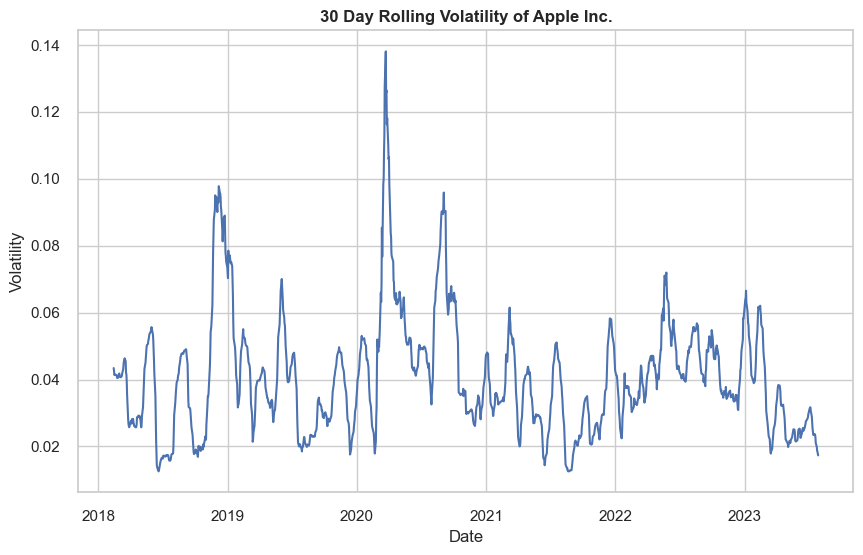

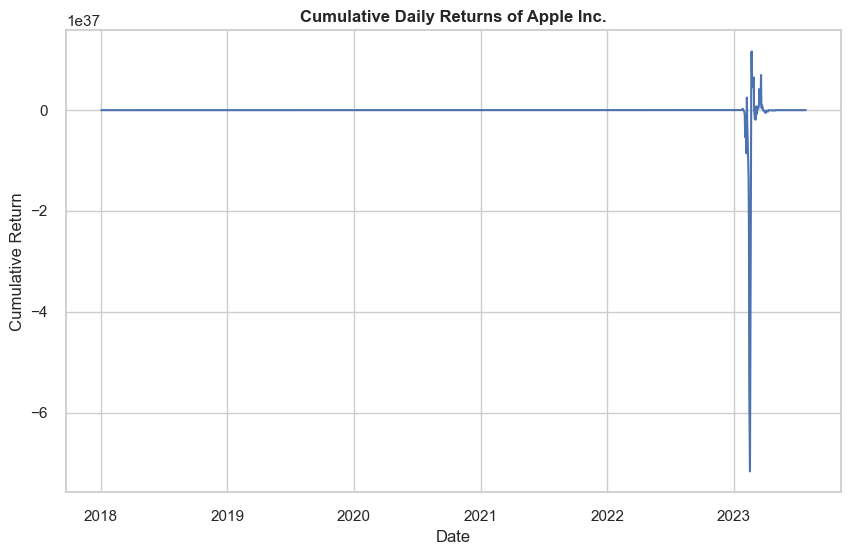

<Axes: title={'center': 'Closing Prices vs 14 Day STD Closing Prices'}, xlabel='Date'>

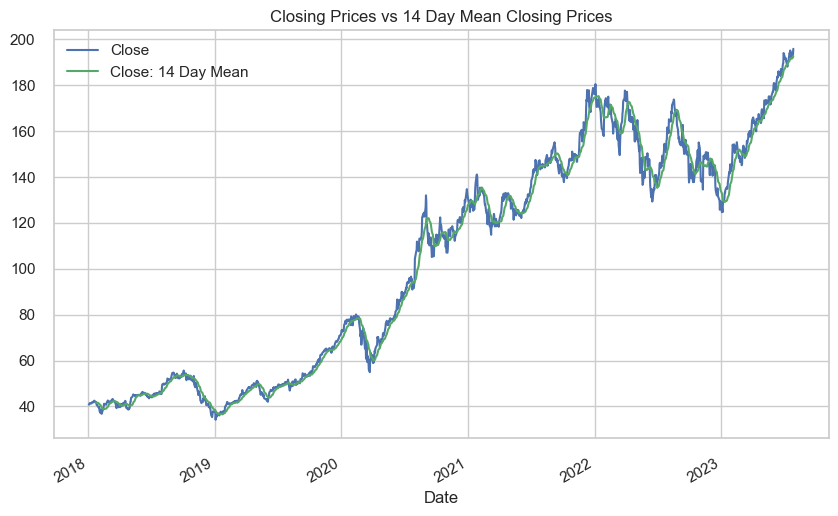

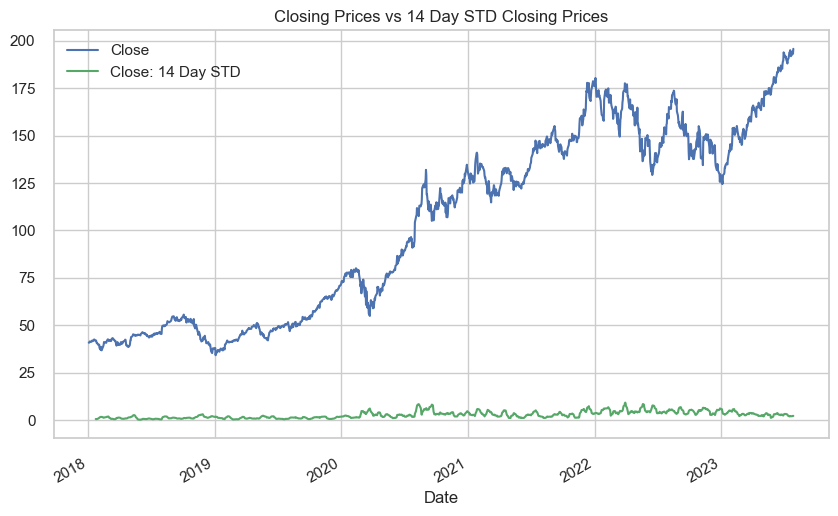

In [488]:
# Calculate the 30 Day Rolling Volatility
stocks_apple['30 Day STD'] = stocks_apple['Close'].rolling(window=30).std()
stocks_apple['Volatility'] = stocks_apple['30 Day STD'] / stocks_apple['Close']

# Visualize 30 Day Rolling Volatility
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
sns.lineplot(data=stocks_apple, x='Date', y='Volatility')
plt.title('30 Day Rolling Volatility of Apple Inc.', fontweight='bold')
plt.show()

# Calculate the cumulative daily returns
stocks_apple['Cumulative Return'] = (1 + stocks_apple['% Daily Price Change']).cumprod()

# Visualize Cumulative Daily Returns
plt.figure(figsize=(10,6))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
sns.lineplot(data=stocks_apple, x='Date', y='Cumulative Return')
plt.title('Cumulative Daily Returns of Apple Inc.', fontweight='bold')
plt.show()

# Visualize the closing price and a 14-day rolling mean of the closing price
stocks_apple['Close: 14 Day Mean'] = stocks_apple['Close'].rolling(window=14).mean()
stocks_apple[['Close','Close: 14 Day Mean']].plot(figsize=(10,6),title='Closing Prices vs 14 Day Mean Closing Prices')

# Visualize the closing price and a 14-day rolling standard deviation of the closing price
stocks_apple['Close: 14 Day STD'] = stocks_apple['Close'].rolling(window=14).std()
stocks_apple[['Close','Close: 14 Day STD']].plot(figsize=(10, 6),title='Closing Prices vs 14 Day STD Closing Prices')



### Stock price prediction using ARIMA Model

To predict an outcome based on time series data, we can use a time series model which is called Auto Regressive Integrated Moving Average (ARIMA) is used as the machine learning technique to analyze and predict future stock prices based on historical prices.

In [489]:
# In a time series problem like stock price prediction, we usually split data chronologically rather than randomly as in the case with other types of machine learning problems.
stocks_apple.sort_index(inplace=True)
stocks_apple['Close_Diff'] = stocks_apple['Close'].diff()
stocks_apple['Log_Close'] = np.log(stocks_apple['Close']) # Feature log-transformation was applied to stabilize the variance of a 'Close' feature and make it more stationary
train_size = int(len(stocks_apple['Close']) * 0.8)
X_train, X_test = stocks_apple[:train_size], stocks_apple[train_size:]


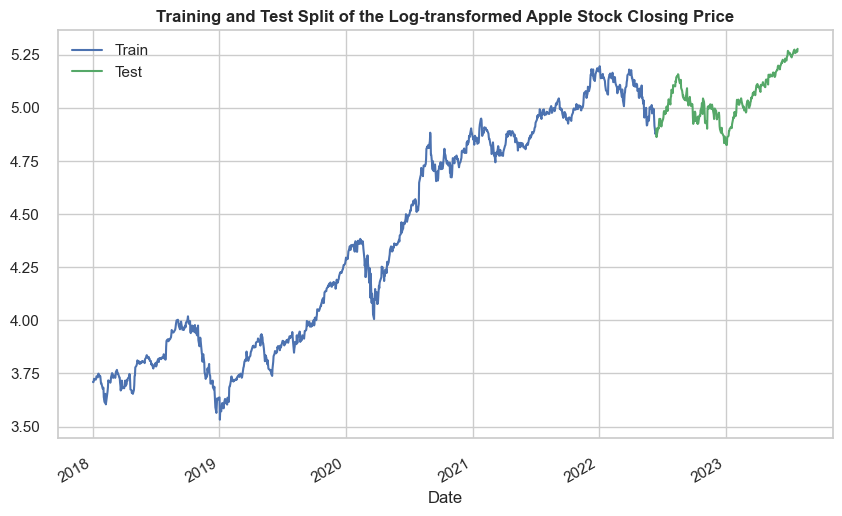

In [490]:
ax = X_train['Log_Close'].plot(grid=True, figsize=(10, 6), label='Train')
X_test['Log_Close'].plot(ax=ax, grid=True, label='Test')
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
plt.legend()
plt.title('Training and Test Split of the Log-transformed Apple Stock Closing Price', fontweight='bold')
plt.show()

In [491]:
# Define function for ADP test
from statsmodels.tsa.stattools import adfuller
def adf_test_stationary(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics
    plt.figure(figsize=(10,6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='orange', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation', fontweight='bold')
    plt.xticks(fontsize=12)
    plt.show(block=False)
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lag Used', 'Number of Observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)


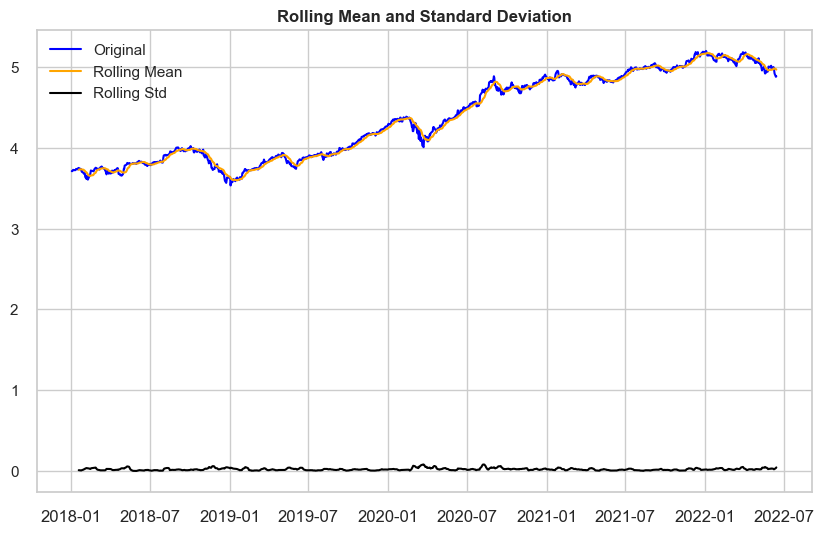

Results of Dickey-Fuller Test:
Test Statistics             -0.877187
p-value                      0.795392
#Lag Used                    9.000000
Number of Observations    1111.000000
Critical Value (1%)         -3.436250
Critical Value (5%)         -2.864145
Critical Value (10%)        -2.568157
dtype: float64


In [492]:
# Apply the ADF test on the training data
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
adf_test_stationary(X_train['Log_Close'])

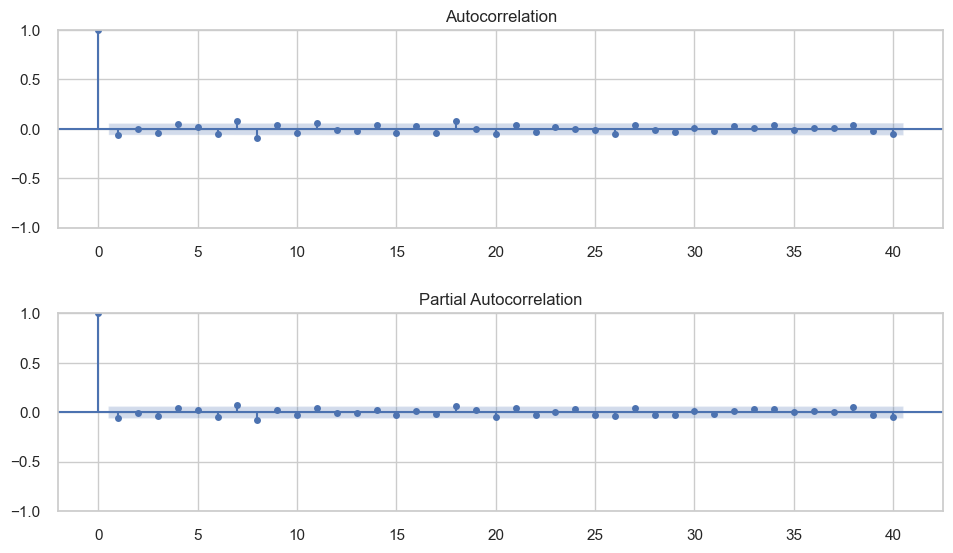

In [493]:
# Plot the autocorrelation and partial autocorrelation of the differences
fig, ax = plt.subplots(2, figsize=(10, 6))
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
sm.graphics.tsa.plot_acf(X_train['Close_Diff'].dropna(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(X_train['Close_Diff'].dropna(), lags=40, ax=ax[1])
plt.tight_layout(pad=2.0)
plt.show()

In [494]:
# Fit an ARIMA model
model = auto_arima(X_train['Log_Close'], trace=True, error_action='ignore', suppress_warnings=True)
model_fit = model.fit(X_train['Log_Close'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5477.419, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5491.499, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5491.037, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5476.621, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5489.604, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5489.648, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5487.566, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5489.956, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.288 seconds


In [495]:
# Forecast the test data
forecast = model.predict(n_periods=len(X_test))
forecast_df = forecast.to_frame(name='Prediction')
forecast_df.index = X_test.index
forecast_df

,Prediction
Date,
2022-06-15 00:00:00-04:00,4.882965
2022-06-16 00:00:00-04:00,4.884091
2022-06-17 00:00:00-04:00,4.885127
2022-06-21 00:00:00-04:00,4.886173
2022-06-22 00:00:00-04:00,4.887218
...,...
2023-07-24 00:00:00-04:00,5.171565
2023-07-25 00:00:00-04:00,5.172611
2023-07-26 00:00:00-04:00,5.173656


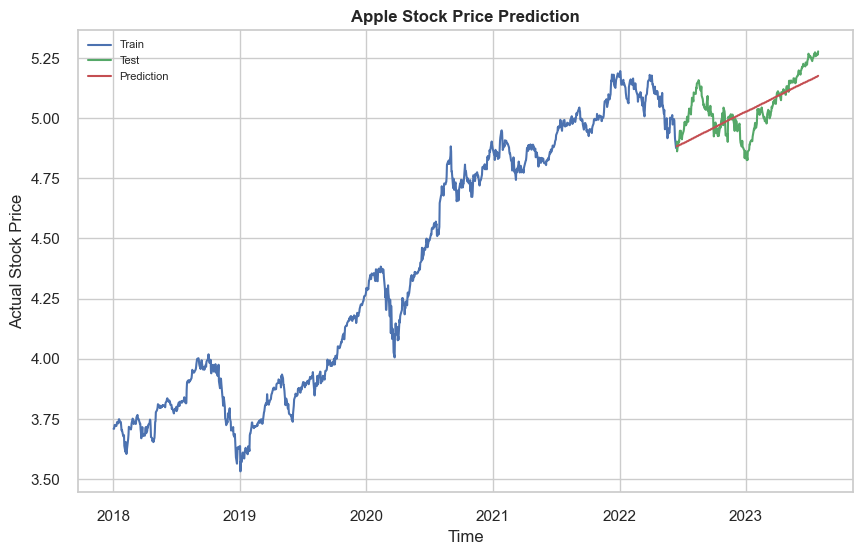

In [496]:
# Plot the actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(X_train['Log_Close'], label='Train')
plt.plot(X_test['Log_Close'], label='Test')
plt.plot(forecast_df, label='Prediction')
plt.title('Apple Stock Price Prediction', fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1121
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2748.750
Date:                Tue, 01 Aug 2023   AIC                          -5491.499
Time:                        02:57:51   BIC                          -5476.436
Sample:                             0   HQIC                         -5485.806
                               - 1121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      1.863      0.063   -6.11e-05       0.002
ar.L1         -0.1195      0.019     -6.318      0.000      -0.157      -0.082
sigma2         0.0004   1.07e-05     40.334      0.0

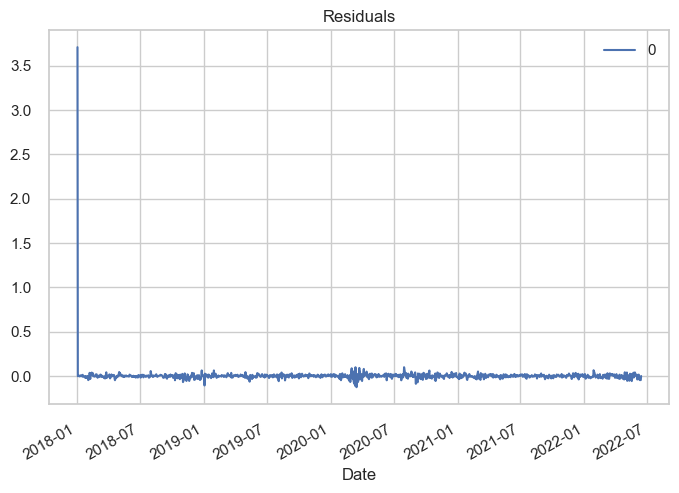

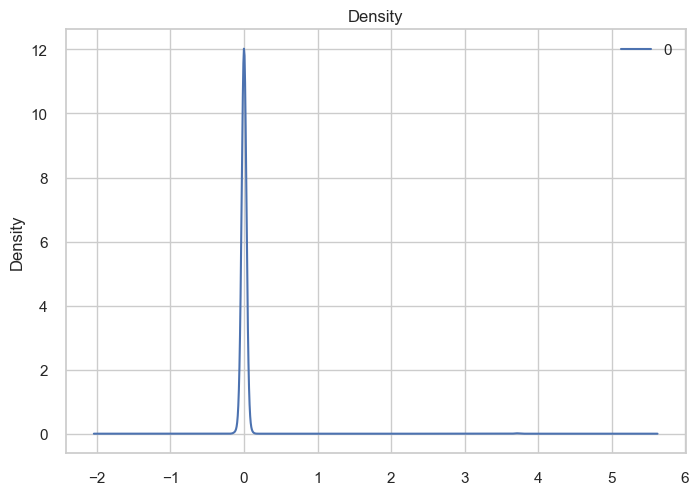

                 0
count  1121.000000
mean      0.003310
std       0.112695
min      -0.125362
25%      -0.009581
50%       0.000330
75%       0.010941
max       3.708410


In [497]:
# Print out model summary
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.arima_res_.resid)
residuals.plot(title='Residuals')
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
plt.show()
residuals.plot(kind='kde', title='Density')
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
plt.show()
print(residuals.describe())


In [498]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Root Mean Square Error (RMSE)
rmse = sqrt(mean_squared_error(np.exp(X_test['Log_Close']), np.exp(forecast_df['Prediction'])))
print('Test RMSE: %.3f' % rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(np.exp(forecast_df['Prediction']) - np.exp(X_test['Log_Close']))/np.abs(np.exp(X_test['Log_Close'])))
print('Test MAPE: %.3f' % mape)


Test RMSE: 13.606
Test MAPE: 0.069


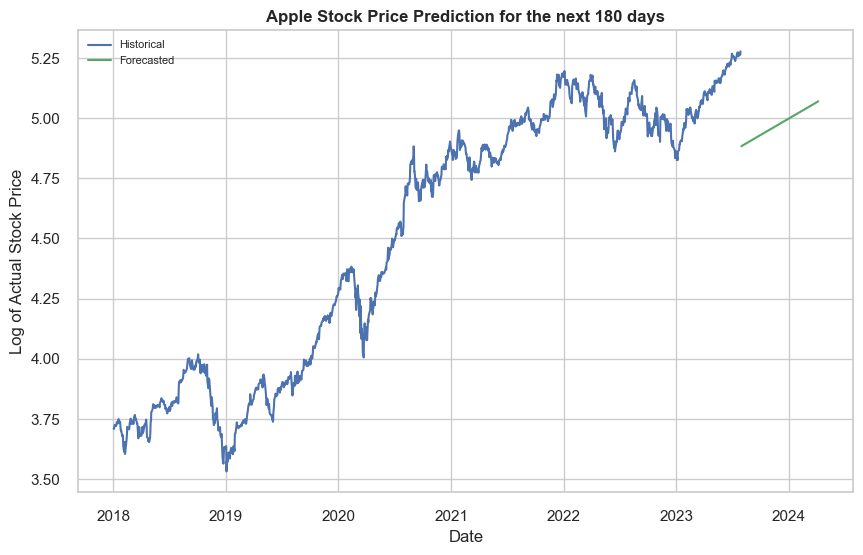

In [499]:
# Forecast the next 180 days
forecast_180 = model.predict(n_periods=180)
forecast_180_df = pd.DataFrame(forecast_180, columns=['Prediction 180 Days'])
new_dates = pd.date_range(start=X_test.index[-1], periods=181, freq='B')[1:]  # 'B' frequency considers only business days
forecast_180_df.index = new_dates
plt.figure(figsize=(10,6))
plt.plot(stocks_apple['Log_Close'], label='Historical')
plt.plot(forecast_180_df, label='Forecasted')
plt.title('Apple Stock Price Prediction for the next 180 days', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Log of Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
plt.show()

